In [1]:
import gym
import matplotlib.pyplot as plt
import torch
import numpy as np
import timebudget
from tqdm.auto import tqdm
timebudget.set_quiet()

In [2]:
import rltrain
from importlib import reload
reload(rltrain)

<module 'rltrain' from '/Users/leodirac/dev/ddpg/rltrain.py'>

In [3]:
env = gym.make('CartPole-v0')
learner = rltrain.DQN(env, gamma=0.9)
learner.show_loss_every = 1000

Creating FCNet with 4->2 dims for 4 observations and 2 actions


In [4]:
import helpers
reload(helpers)

<module 'helpers' from '/Users/leodirac/dev/ddpg/helpers.py'>

2256


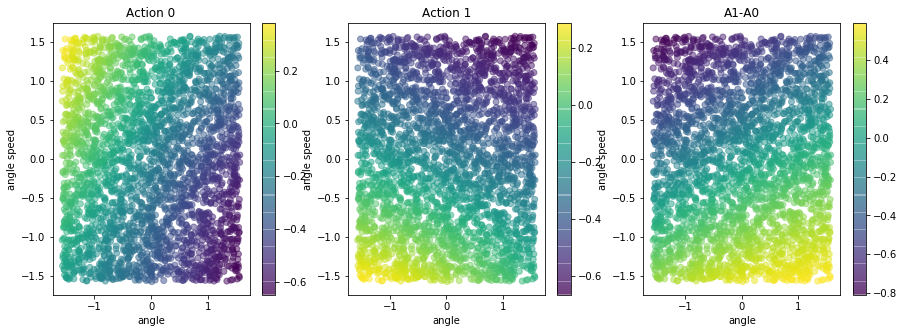

Loss = 0.58140
10974


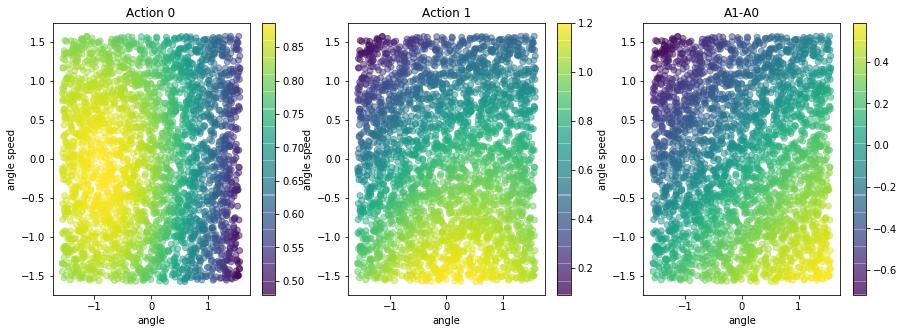

Loss = 0.41697
Loss = 0.32906
Loss = 0.35282
Loss = 0.28396
Loss = 0.25288
Loss = 0.34359
Loss = 0.30846
Loss = 0.12379
Loss = 0.22781
19567


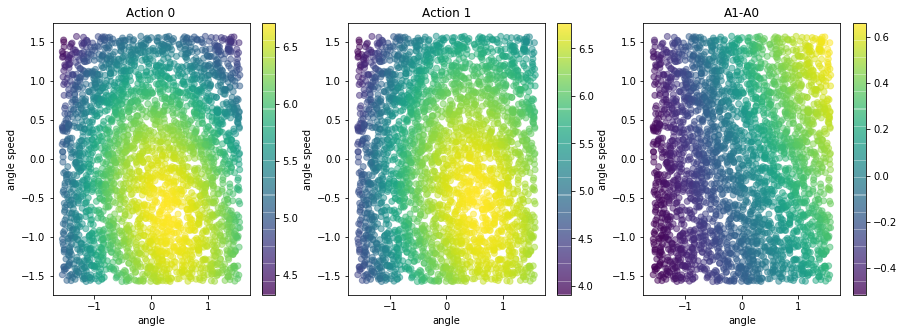

Loss = 0.21882
Loss = 0.07073
Loss = 0.50471
Loss = 0.23039
Loss = 0.37125
Loss = 0.21889
Loss = 0.57156
Loss = 0.20170
28497


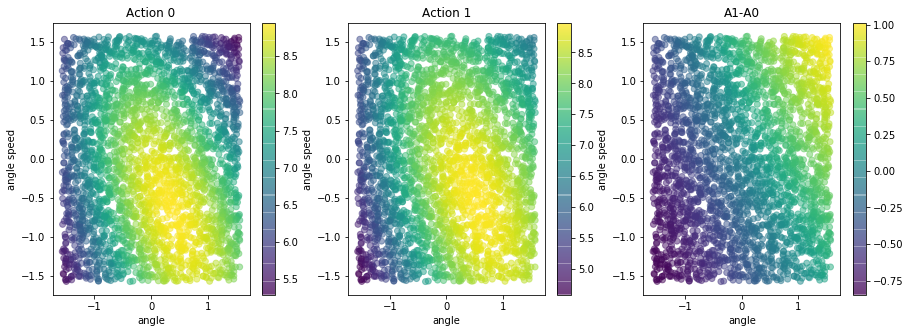

Loss = 0.21373
Loss = 0.23304
Loss = 0.42047
Loss = 0.01447
Loss = 0.24055
Loss = 0.38559
Loss = 0.21202
Loss = 0.41859
Loss = 0.37643
37260


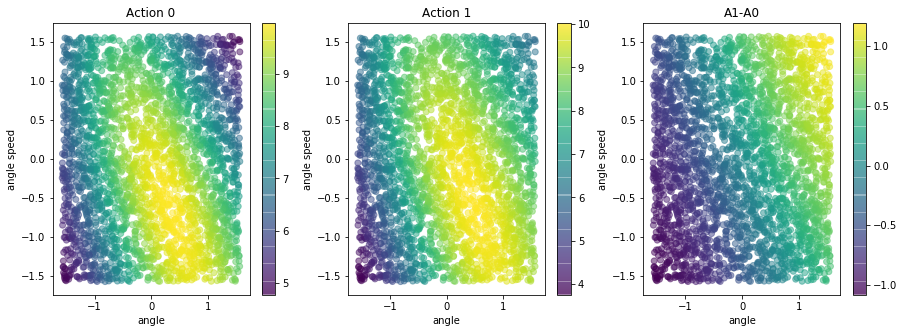

Loss = 0.00708
Loss = 0.00591
Loss = 0.39451
Loss = 0.17919
Loss = 0.00519
Loss = 0.66179



In [5]:
learner.eps = 1
for i in tqdm(range(2000), "random warmup"):
    learner.rollout()
    if i % 400 == 99:
        print(len(learner._replay))
        helpers.plot_q(learner)



Eps = 1.00 on 1 of 10
Loss = 0.22385
Loss = 0.34558


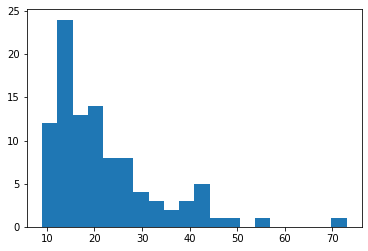

Reward mean,std = 22.290 +/- 11.247


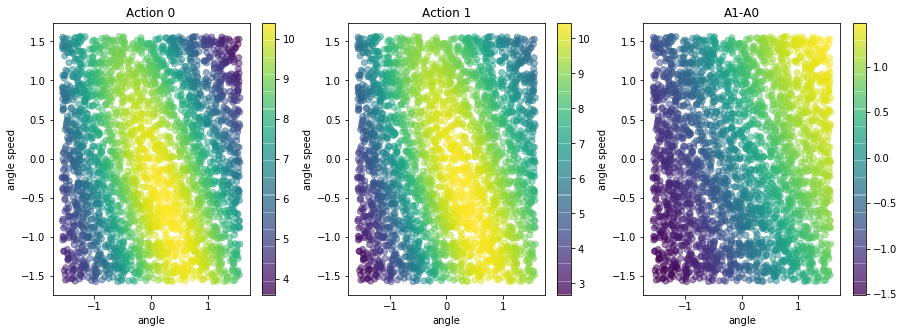



Eps = 0.90 on 2 of 10
Loss = 0.19513
Loss = 0.00481
Loss = 0.19767


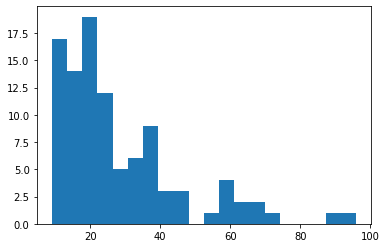

Reward mean,std = 28.280 +/- 17.699


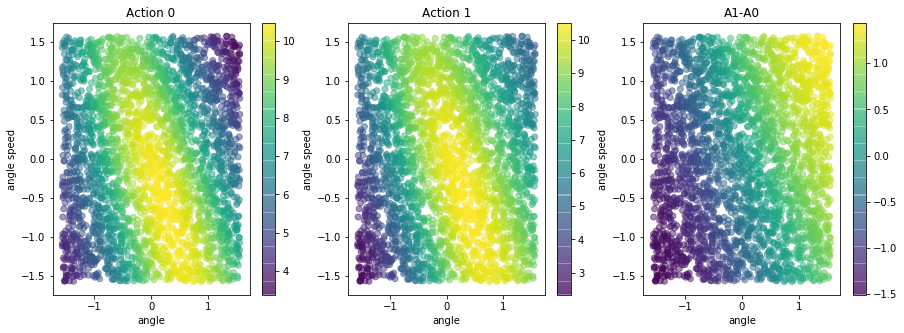



Eps = 0.81 on 3 of 10
Loss = 0.15591
Loss = 0.00799
Loss = 0.35443
Loss = 0.80780


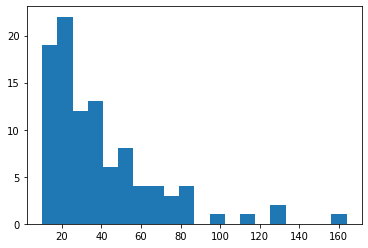

Reward mean,std = 39.150 +/- 28.397


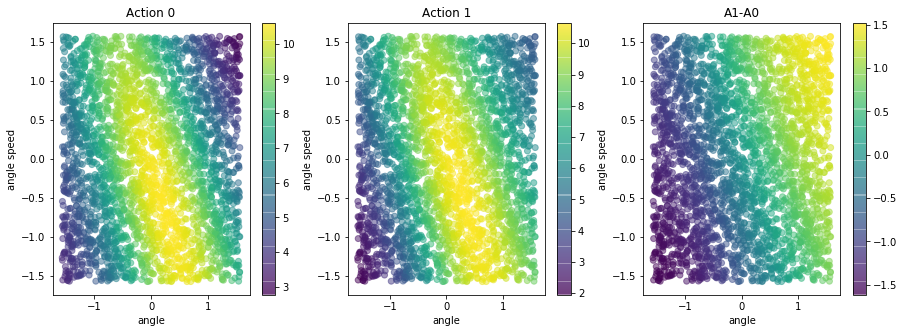



Eps = 0.71 on 4 of 10
Loss = 0.52794
Loss = 0.24356
Loss = 0.00885
Loss = 0.25975
Loss = 0.45710


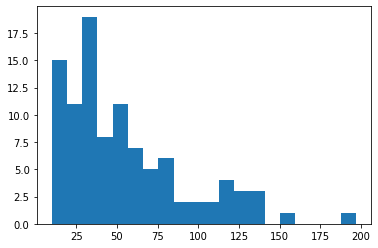

Reward mean,std = 55.430 +/- 37.950


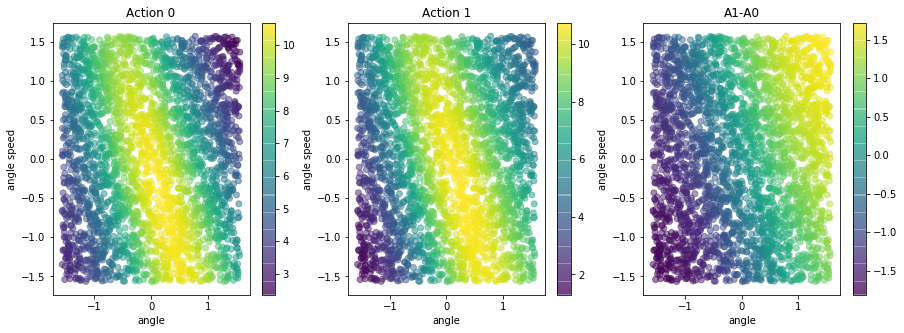



Eps = 0.62 on 5 of 10
Loss = 0.41970
Loss = 0.58572
Loss = 0.23139
Loss = 0.24945
Loss = 0.00651
Loss = 0.24442
Loss = 0.20977
Loss = 0.01101


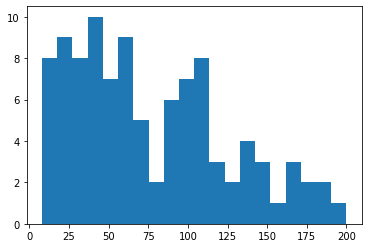

Reward mean,std = 77.010 +/- 48.701


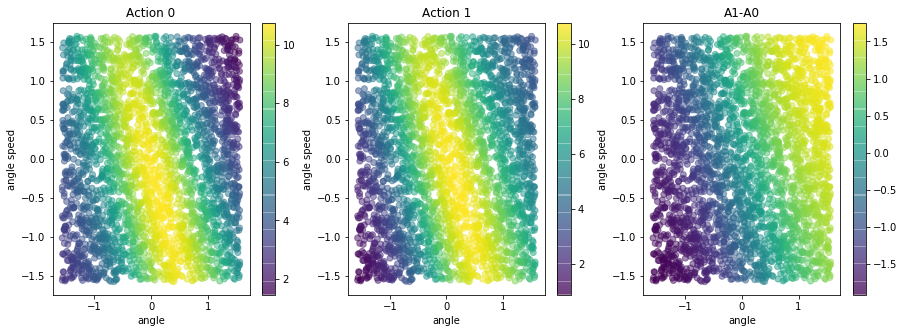



Eps = 0.52 on 6 of 10
Loss = 0.00608
Loss = 0.00667
Loss = 0.17436
Loss = 0.22097
Loss = 0.25770
Loss = 0.23634
Loss = 0.21685
Loss = 0.24186
Loss = 0.21348
Loss = 0.00691
Loss = 0.24851


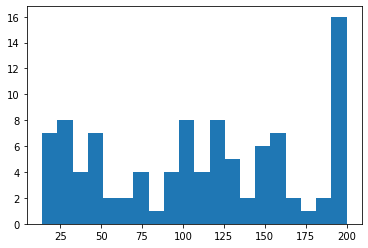

Reward mean,std = 110.680 +/- 59.524


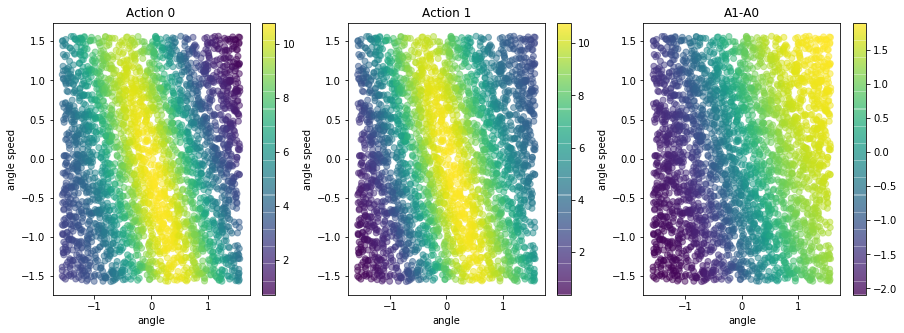



Eps = 0.43 on 7 of 10
Loss = 0.00531
Loss = 0.33835
Loss = 0.58514
Loss = 0.43995
Loss = 0.00377
Loss = 0.34497
Loss = 0.14826
Loss = 0.00360
Loss = 0.00443
Loss = 0.00353
Loss = 0.00621
Loss = 0.18243
Loss = 0.00511
Loss = 0.00831
Loss = 0.19640


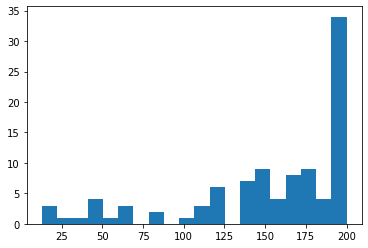

Reward mean,std = 152.350 +/- 52.056


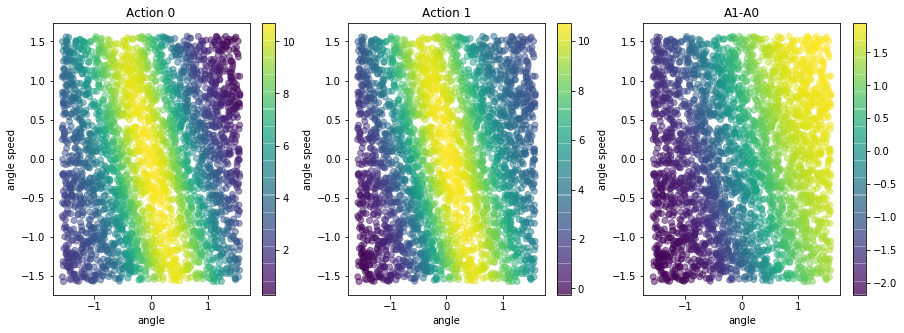



Eps = 0.33 on 8 of 10
Loss = 0.43466
Loss = 0.26029
Loss = 0.21605
Loss = 0.41881
Loss = 0.00608
Loss = 0.00375
Loss = 0.00474
Loss = 0.35531
Loss = 1.04986
Loss = 0.64065
Loss = 0.00381
Loss = 0.00454
Loss = 0.00702
Loss = 0.13799
Loss = 0.00301
Loss = 0.23634
Loss = 0.37245
Loss = 0.40108


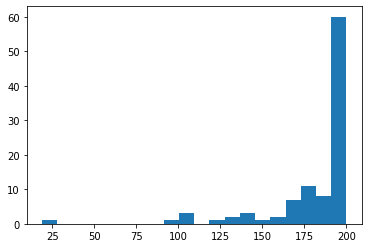

Reward mean,std = 182.730 +/- 29.560


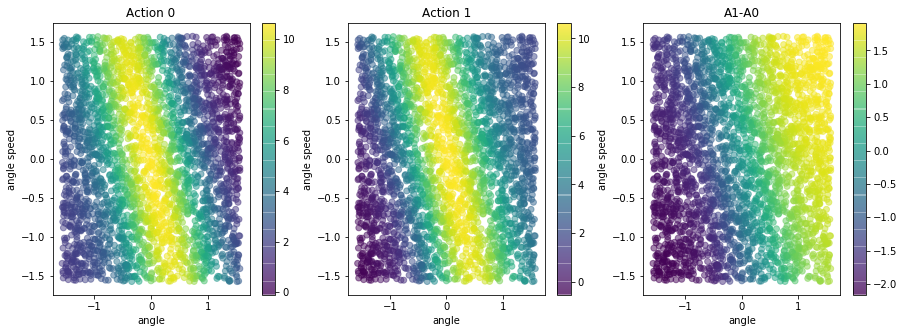



Eps = 0.24 on 9 of 10
Loss = 0.00334
Loss = 0.21549
Loss = 0.00139
Loss = 0.20234
Loss = 0.00447
Loss = 0.26029
Loss = 0.00212
Loss = 0.13674
Loss = 0.35249
Loss = 0.00418
Loss = 0.19506
Loss = 0.00299
Loss = 0.00139
Loss = 0.15454
Loss = 0.20892
Loss = 0.18569
Loss = 0.00168
Loss = 0.00273
Loss = 0.18619


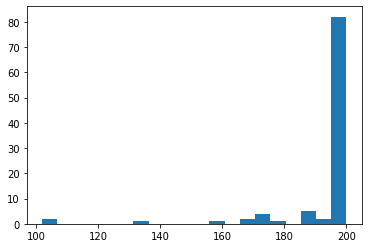

Reward mean,std = 194.250 +/- 16.639


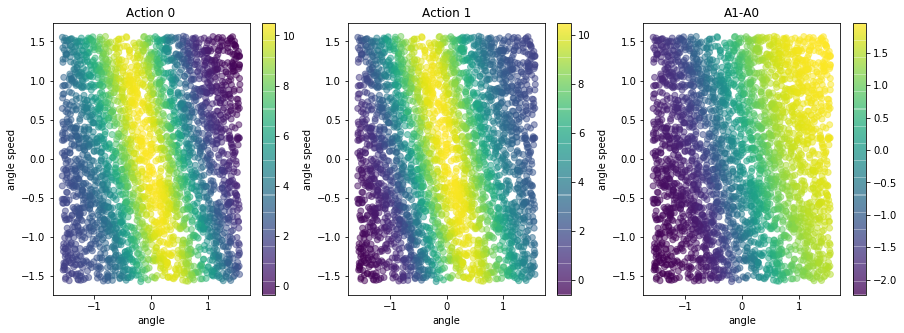



Eps = 0.14 on 10 of 10
Loss = 0.00271
Loss = 0.21761
Loss = 0.00386
Loss = 0.17512
Loss = 0.27793
Loss = 0.18425
Loss = 0.47082
Loss = 0.00212
Loss = 0.00082
Loss = 0.00238
Loss = 0.00170
Loss = 0.00200
Loss = 0.00112
Loss = 0.00118
Loss = 0.00146
Loss = 0.00085
Loss = 0.00178
Loss = 0.00125
Loss = 0.00104
Loss = 0.23417


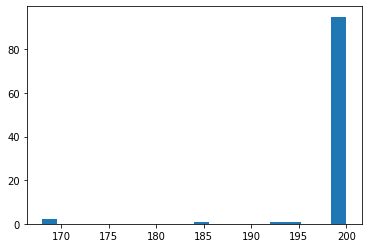

Reward mean,std = 199.090 +/- 4.725


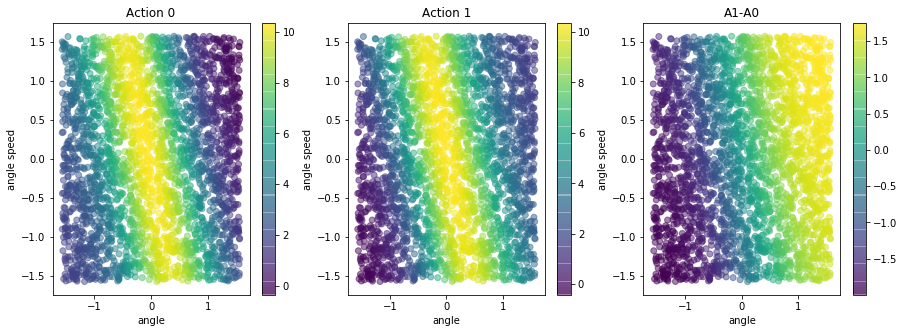

In [6]:
N = 10
for d in range(N):
    eps = 1.0 - d/(N+0.5)
    print(f"\n\nEps = {eps:.2f} on {d+1} of {N}")
    _ = helpers.rollout_score_dist(learner, eps)
    helpers.plot_q(learner)

Loss = 0.00075
Loss = 0.00041
Loss = 0.00132
Loss = 0.00093
Loss = 0.00103
Loss = 0.21405
Loss = 0.00092
Loss = 0.00061
Loss = 0.00149
Loss = 0.24151
Loss = 0.27183
Loss = 0.00021
Loss = 0.00034
Loss = 0.00019
Loss = 0.00052
Loss = 0.00067
Loss = 0.00076
Loss = 0.00099
Loss = 0.00029
Loss = 0.00063


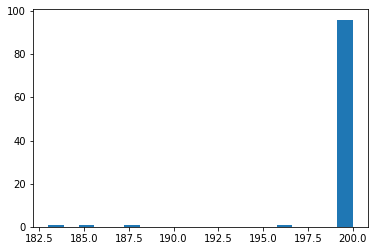

Reward mean,std = 199.520 +/- 2.551


In [7]:
# check greedy
_ = helpers.rollout_score_dist(learner, 0)

Loss = 0.00061
Loss = 0.00068


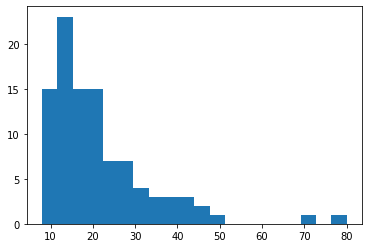

Reward mean,std = 21.360 +/- 12.191


In [8]:
# check random
_ = helpers.rollout_score_dist(learner, 1)

In [9]:
timebudget.report('rollout')

timebudget report per rollout cycle...
                  rollout: 100.0%    56.99ms/cyc @     1.0 calls/cyc
              do_learning:  91.7%    52.26ms/cyc @    52.8 calls/cyc
                optimizer:  50.5%    28.76ms/cyc @    49.9 calls/cyc
                   sample:  16.9%     9.61ms/cyc @    49.9 calls/cyc
                 q_target:  10.3%     5.87ms/cyc @    49.9 calls/cyc


In [10]:
learner.eps=0
learner.rollout(render=True)

(199, 200.0)